<a href="https://colab.research.google.com/github/bayan-almasri10/pca-heart-disease/blob/main/heart_disease_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/machine learning/heart disease pca/heart.xls")

In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
data = data.dropna() # remove any empty value

In [ ]:
featuers = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

x = data[featuers]
y = data['target']

#splate the data to features and target

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
# calculate the variance and the main for each element

In [ ]:
pca = PCA(n_components = 0.95) #choose the element has 95% variance
principal_components = pca.fit_transform(x_scaled)

In [ ]:
print("Variation ratio for each component:", pca.explained_variance_ratio_)
print("Total number of components:", pca.n_components_)

Variation ratio for each component: [0.21254053 0.11820708 0.09406418 0.09085735 0.07861281 0.07461661
 0.06636692 0.05968811 0.05530196 0.04781309 0.04077729 0.03254941]
Total number of components: 12


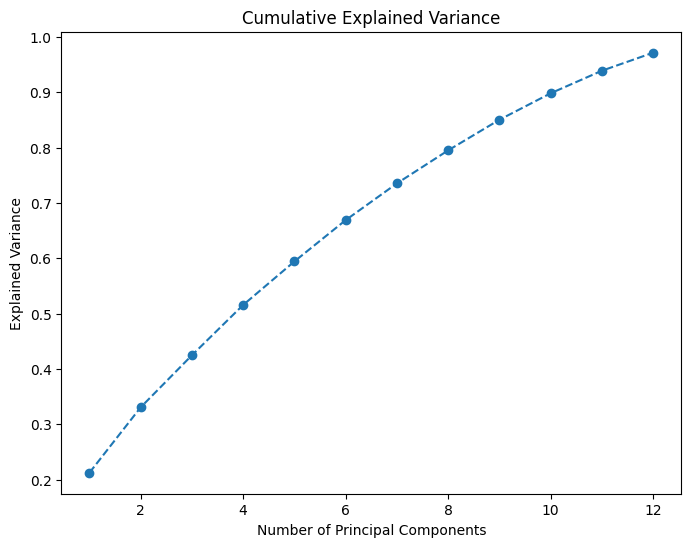

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance')
plt.show()


In [ ]:
loadings = pd.DataFrame(pca.components_, columns=featuers, index=[f'PC{i+1}' for i in range(pca.n_components_)])
print(loadings)

print("the most important feature for each component:")
for i in range(len(loadings)):
    print(f'Main Component: {i+1}:')
    print(loadings.iloc[i].sort_values(ascending=False)[:3],'\n')


           age       sex        cp  trestbps      chol       fbs   restecg  \
PC1   0.314203  0.090838 -0.274607  0.183920  0.117375  0.073640 -0.127728   
PC2   0.406149 -0.377792  0.297266  0.438187  0.364514  0.317433 -0.220882   
PC3  -0.094077  0.554849  0.356974  0.203849 -0.407825  0.481736 -0.089191   
PC4   0.020662  0.255309 -0.287900 -0.022601  0.343410  0.068605 -0.266096   
PC5   0.307153 -0.050704 -0.163179 -0.188138 -0.320067  0.233442  0.393667   
PC6   0.128296 -0.054969  0.193411  0.179460  0.104730 -0.249614  0.666813   
PC7  -0.223730 -0.162507 -0.215390  0.332763  0.049329  0.510818  0.396896   
PC8   0.262477  0.175992 -0.047950  0.595334 -0.372381 -0.432863 -0.099841   
PC9  -0.379000 -0.198925 -0.351432  0.350392 -0.153975 -0.177004 -0.038304   
PC10 -0.016722  0.535619  0.164351  0.071524  0.495170 -0.153696  0.269966   
PC11 -0.140544 -0.287600  0.594284 -0.064130 -0.108874 -0.142103 -0.095545   
PC12  0.548235 -0.011016 -0.097208 -0.258721 -0.183790  0.024730

In [ ]:
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df['target'] = y

print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.624111  2.321270  2.474673 -2.676239 -0.375253 -1.713567 -0.120352   
1 -0.455988 -0.957351  1.139595 -2.426838 -2.273767  0.787861 -0.081513   
2 -1.828805  0.042885 -0.452229 -0.406415 -0.867802 -0.767551 -0.104852   
3 -1.716006 -0.495337  0.030631  0.112162  0.235598  0.502665 -0.142754   
4 -0.371356  0.301156 -2.841069  0.809042 -0.011389  0.085495  1.415596   

        PC8       PC9      PC10      PC11      PC12  target  
0 -0.736557 -0.638940  0.932651 -0.558115  0.404075       1  
1 -1.535384  1.241824  1.165681 -0.492133  0.232260       1  
2  0.063523  1.293202 -1.147066  0.363725  0.177977       1  
3  0.177462 -0.152965  0.706572 -0.700291  1.073581       1  
4 -0.607134 -0.186315  0.907423  0.414451  0.884467       1  


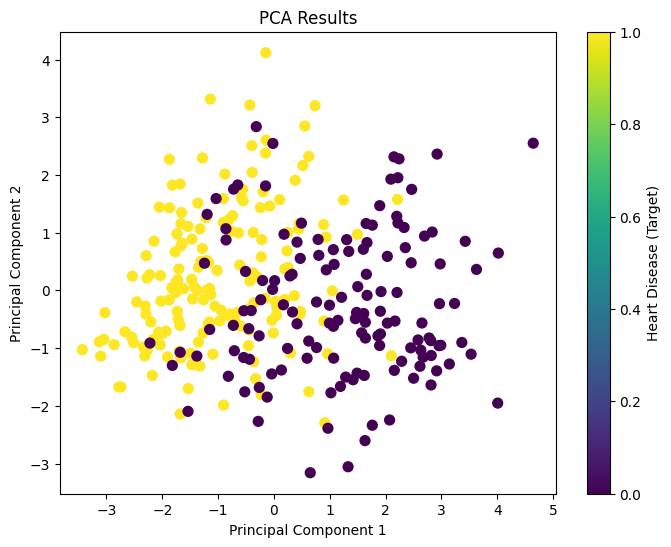

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['target'], cmap='viridis', s=50)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Heart Disease (Target)')
plt.show()
